In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

base_dir = Path.home() / "Documentos" / "dark"

tables_dir = base_dir / "ransomtales" / "results" / "tables"
processed_dir = base_dir / "ransomtales" / "data" / "processed"

top_actors_path = tables_dir / "blackbasta_top_actors_by_msgs.csv"
by_day_path = tables_dir / "blackbasta_msgs_by_day.csv"
by_actor_day_path = tables_dir / "blackbasta_msgs_by_actor_day.csv"
by_chat_day_path = tables_dir / "blackbasta_msgs_by_chat_day.csv"
messages_path = processed_dir / "blackbasta_messages.csv"

# sanity check explícito
for p in [top_actors_path, by_day_path]:
    print(p, "exists:", p.exists())



/home/drjekyll/Documentos/dark/ransomtales/results/tables/blackbasta_top_actors_by_msgs.csv exists: True
/home/drjekyll/Documentos/dark/ransomtales/results/tables/blackbasta_msgs_by_day.csv exists: True


In [4]:
#Tablas
top = pd.read_csv(top_actors_path)
by_day = pd.read_csv(by_day_path)
by_actor_day = pd.read_csv(by_actor_day_path)
by_chat_day = pd.read_csv(by_chat_day_path)

top.head(10)


,actor,n_messages
0,usernamegg,83237
1,lapa,26372
2,w,13454
3,usernamenn,8520
4,usernameyy,7216
5,n3auxaxl,6407
6,usernameugway,6079
7,usernamess,5528
8,nickolas,3670
9,cameron777,3642


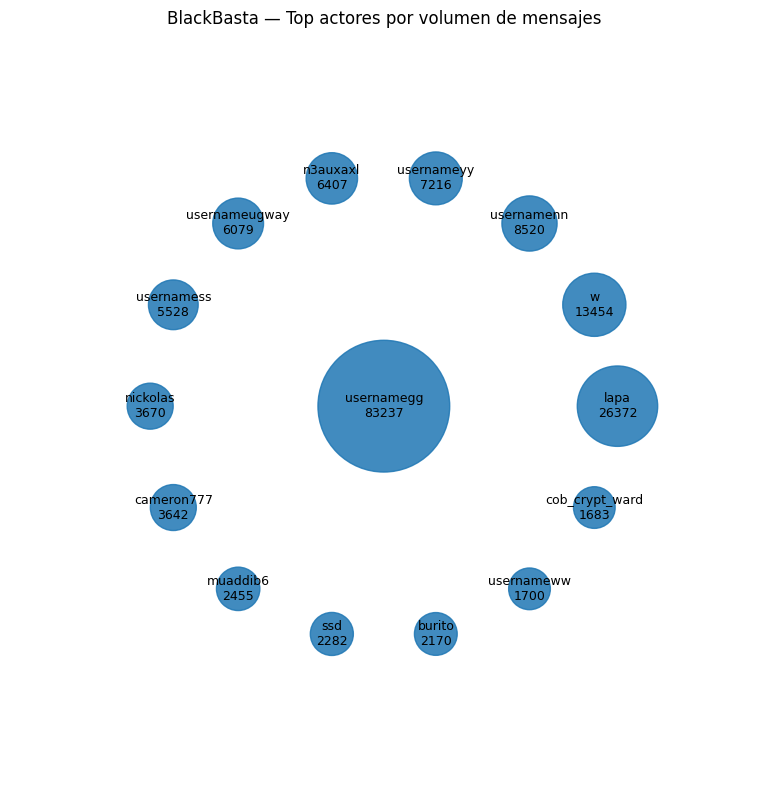

In [16]:
#VER EN CIRCULOS
import matplotlib.pyplot as plt
import numpy as np

df = df.sort_values("n_messages", ascending=False).reset_index(drop=True)

# Escalado de áreas
vals = df["n_messages"].astype(float).to_numpy()
min_area, max_area = 900, 9000

if vals.max() == vals.min():
    areas = np.full_like(vals, (min_area + max_area) / 2)
else:
    areas = min_area + (vals - vals.min()) * (max_area - min_area) / (vals.max() - vals.min())

# Layout radial
n = len(df)
coords = np.zeros((n, 2))

if n > 1:
    R = 1.0
    angles = np.linspace(0, 2 * np.pi, n - 1, endpoint=False)
    coords[0] = (0, 0)
    coords[1:, 0] = R * np.cos(angles)
    coords[1:, 1] = R * np.sin(angles)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(coords[:, 0], coords[:, 1], s=areas, alpha=0.85)

for (x, y), actor, count in zip(coords, df["actor"], df["n_messages"]):
    plt.text(x, y, f"{actor}\n{int(count)}", ha="center", va="center", fontsize=9)

plt.title("BlackBasta — Top actores por volumen de mensajes")
plt.axis("off")
plt.gca().set_aspect("equal")
plt.xlim(-1.6, 1.6)
plt.ylim(-1.6, 1.6)
plt.tight_layout()
plt.show()


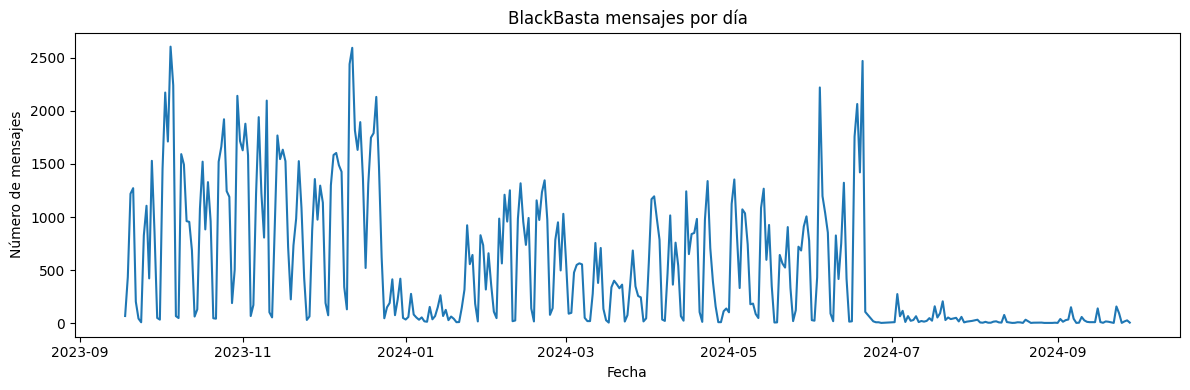

In [18]:
#por dia
by_day["day"] = pd.to_datetime(by_day["day"], errors="coerce")

plt.figure(figsize=(12,4))
plt.plot(by_day["day"], by_day["n_messages"])
plt.title("BlackBasta mensajes por día")
plt.xlabel("Fecha")
plt.ylabel("Número de mensajes")
plt.tight_layout()
plt.show()


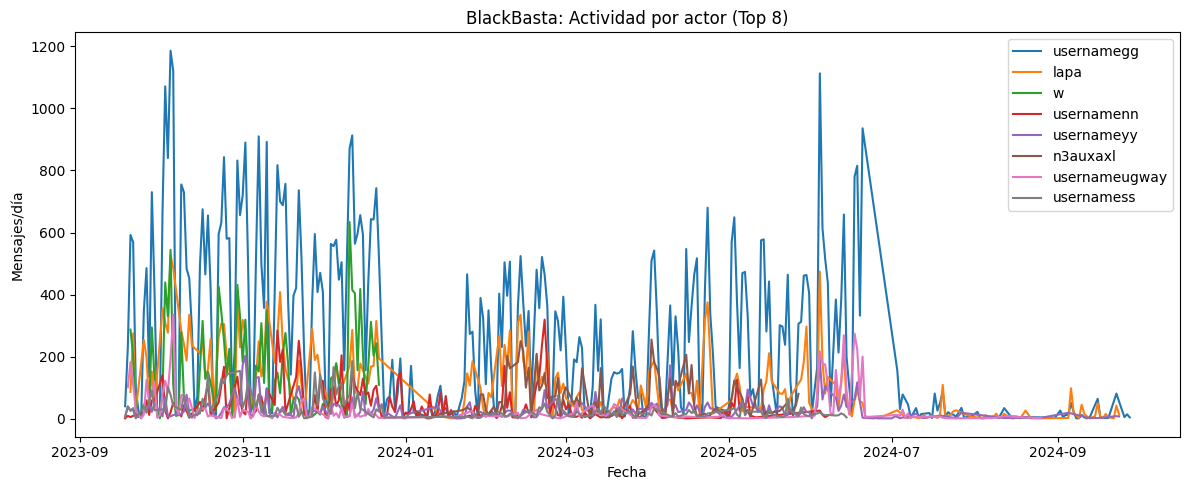

In [19]:
#Timeline por actor
topN = 8
actors_top = top.head(topN)["actor"].tolist()

tmp = by_actor_day[by_actor_day["actor"].isin(actors_top)].copy()
tmp["day"] = pd.to_datetime(tmp["day"], errors="coerce")

plt.figure(figsize=(12,5))
for a in actors_top:
    s = tmp[tmp["actor"] == a].sort_values("day")
    plt.plot(s["day"], s["n_messages"], label=a)

plt.title(f"BlackBasta: Actividad por actor (Top {topN})")
plt.xlabel("Fecha")
plt.ylabel("Mensajes/día")
plt.legend()
plt.tight_layout()
plt.show()


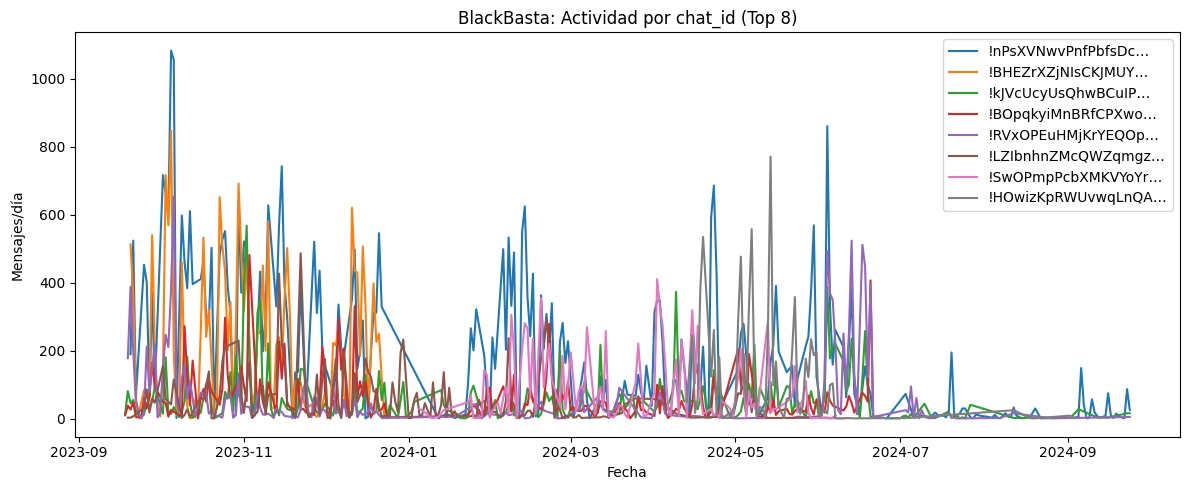

In [20]:
#Por rooms
top_chats = (
    by_chat_day.groupby("chat_id")["n_messages"].sum()
    .sort_values(ascending=False)
    .head(8)
    .index.tolist()
)

tmp = by_chat_day[by_chat_day["chat_id"].isin(top_chats)].copy()
tmp["day"] = pd.to_datetime(tmp["day"], errors="coerce")

plt.figure(figsize=(12,5))
for c in top_chats:
    s = tmp[tmp["chat_id"] == c].sort_values("day")
    plt.plot(s["day"], s["n_messages"], label=c[:18] + "…")

plt.title("BlackBasta: Actividad por chat_id (Top 8)")
plt.xlabel("Fecha")
plt.ylabel("Mensajes/día")
plt.legend()
plt.tight_layout()
plt.show()
